This notebook shows how to use LLM-Geo, you can uncomment a study case (preferred Case 1 and Case 3) to get the spatial analysis results without any human intervention. 

Please check the [webpage of LLM-Geo](https://github.com/gladcolor/LLM-Geo) for more detail!


#  Install package

In [24]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install openai

D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\LLM_Cat_Constants.py:42: SyntaxWarning: invalid escape sequence '\T'
  'The node attributes include: 1) node_type (data or operation), 2) data_path (data node only, set to "" if not given ), and description. E.g., {‘name’: “County boundary”, “data_type”: “data”, “data_path”: “D:\Test\county.shp”,  “description”: “County boundary for the study area”}.',


# Import package

In [25]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output

# Define Solution class
Please run the following cell to define the functions

In [26]:
%load_ext autoreload
%autoreload 2

import LLM_Cat_Constants as constants
import helper

from LLM_Cat_kernel import Solution



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [27]:
# isReview = True
isReview = False

In [28]:

# Case 1: population living near hazardous wastes

# task_name ='Resident_at_risk_counting'
# TASK = r"""1) Find out Census tracts that contain hazardous waste facilities, then comppute and print out the population living in those tracts. The study area is North Carolina (NC), US.
# 2) Generate a population choropleth map for all tract polygons in NC, rendering the color by tract population; and then highlight the borders of tracts that have hazardous waste facilities. Please draw all polygons, not only the highlighted ones. The map size is 15*10 inches.
# """

# DATA_LOCATIONS = ["NC hazardous waste facility ESRI shape file: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/HW_Sites_EPSG4326.zip.",
#                   "NC tract boundary shapefile: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_37_EPSG4326.zip. The tract ID column is 'GEOID', data types is integer.",
#                   "NC tract population CSV file: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv. The population is stored in 'TotalPopulation' column. The tract ID column is 'GEOID', data types is integer."
#                  ]
 


# # Case 3: COVID-19 death rate in US
# task_name ='COVID_death_rate'
# TASK = r'''1) Draw a choropleth map to show the death rate (death/case) of COVID-19 among the countiguous US counties. Use the accumulated COVID-19 data of 2020.12.31 to compute the death rate. Use scheme ='quantiles' when plotting the map.  Set map projection to 'Conus Albers'. Set map size to 15*10 inches.  
# 2) Draw a scatter plot to show the correlation and trend line of the death rate with the senior resident rate, including the r-square and p-value. Set data point transparency to 50%, regression line as red. Set figure size to 15*10 inches.  
# '''


# DATA_LOCATIONS = [
#                   r"COVID-19 data case in 2020 (county-level): https://github.com/nytimes/covid-19-data/raw/master/us-counties-2020.csv. This data is for daily accumulated COVID cases and deaths for each county in the US. There are 5 columns: date (format: 2021-02-01), county, state, fips, cases, deaths. ",   
#                   r"Contiguous US county boundary (ESRI shapefile): https://github.com/gladcolor/spatial_data/raw/master/contiguous_counties.zip. The county FIPS column is 'GEOID'; map projection is EPSG:4269",
#                   r"Census data (ACS2020): https://raw.githubusercontent.com/gladcolor/spatial_data/master/Demography/ACS2020_5year_county.csv. THe needed columns are: 'FIPS', 'Total Population', 'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over'. Drop rows with NaN cells after loading the used columns.",
#                  ]



# # Case 4: Hospital_accessibility
# task_name ='Hospital_accessibility'
# TASK = r'''
# For each zipcode area in South Carolina (SC), calculate the distance from the centroid of the zipcode area to its nearest hospital, and then create a choropleth distance map of zipcode area polygons (unit: km), also show the hospital.
# '''

# DATA_LOCATIONS = [
# r"SC zipcode boundary shapefile: https://github.com/GIBDUSC/test/raw/master/sc_zip_boundary.zip, the map projection is WGS1984.",
# r"SC hospitals:  https://github.com/gladcolor/spatial_data/raw/master/South_Carolina/SC_hospitals_with_emergency_room_cleaned.csv, location columns: longitude in 'POINT_X' column, latitude in 'POINT_Y' column.",          
# ]


## Case 5: Census API
# task_name ='Census_API'
# TASK = r''' Show the spatial distribution of the county level median income in the contigous US. Set figure size to (25,15)
# '''

# DATA_LOCATIONS = [
#       "You can use the Census API.",
# ]

# DATA_LOCATIONS = [
# '''Census API key: ae7be70727932dd6aed257692de3f344365d0678'''              
# ]

# Case 6: Traffic noise
task_name ='Traffic_noise_near_schools'
TASK = r'''1. Create a map to show the noise level near the schools. The location is Columbia, SC. 
2. Carefuly design the map, make it beautify. The title, north arrow, scalebar, legend, and designer are needed. The designer is "LLM-Cat".
3. The map dimension is A4.
4. You can overlay the school layer above the noise layer. Give two layers beautify color schemes.
'''

DATA_LOCATIONS = [
    """School boundary file, ESRI shapefile: https://github.com/gladcolor/LLM-Cat/raw/master/Data/schools.zip. The school names are in the 'name' column.
    Noise level file of South Carolina, GeoTIFF format: https://github.com/gladcolor/LLM-Cat/raw/master/Columbia_noise3.tif.
    """

]
 

save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
# model=r"gpt-4"
model = r'gpt-4-turbo-preview'
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional cartographer and programmer good at Python. You have worked on cartography more than 20 years, and know every detail and pitfall when visulizing spatial data and coding. You know well how to set up workflows for cartography tasks. You have significant experence on visualizing spatial data and graph theory. You are also experienced on generating map using Matplotlib, GeoPandas and other interative Python packages, such as Plotly.
 

Your task: Generate a graph (data structure) only, whose nodes are a series of consecutive steps to make a map, including visualize the data, add map element such as title, legend, scalebar, label, and annotaion:  
 1. Create a map to show the noise level near the schools. The location is Columbia, SC. 
2. Carefuly design the map, make it beautify. The title, north arrow, scalebar, legend, and designer are needed. The designer is "LLM-Cat".
3. The map dimension is A4.
4. You can overlay the school laye

## Get graph code from GPT API

In [29]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# Data loading/collection nodes
G.add_node("schools_zip_path", node_type="data", data_path="https://github.com/gladcolor/LLM-Cat/raw/master/Data/schools.zip", description="School boundaries shapefile URL")
G.add_node("noise_tif_path", node_type="data", data_path="https://github.com/gladcolor/LLM-Cat/raw/master/Columbia_noise3.tif", description="Noise level file URL")

# Operation nodes for data loading
G.add_node("load_schools_shapefile", node_type="operation", description="Load school boundaries shapefile")
G.add_node("load_noise_level_raster", node_type="operation", description="Load noise level raster")

# Data output nodes from data loading
G.add_node("schools_gdf", node_type="data", description="Schools GeoDataFrame")
G.add_node("noise_raster", node_type="data", description="Noise level raster")

# Edges from data sources to operations
G.add_edge("schools_zip_path", "load_schools_shapefile")
G.add_edge("noise_tif_path", "load_noise_level_raster")

# Edges from operations to data outputs
G.add_edge("load_schools_shapefile", "schools_gdf")
G.add_edge("load_noise_level_raster", "noise_raster")

# Operation node for overlaying school layer on noise layer
G.add_node("overlay_schools_on_noise", node_type="operation", description="Overlay schools layer on noise layer")
G.add_edge("schools_gdf", "overlay_schools_on_noise")
G.add_edge("noise_raster", "overlay_schools_on_noise")

# Output node for the overlay operation
G.add_node("map_with_layers", node_type="data", description="Map with overlayed schools and noise layers")
G.add_edge("overlay_schools_on_noise", "map_with_layers")

# Operation nodes for adding map elements
G.add_node("add_title", node_type="operation", description="Add map title")
G.add_node("add_north_arrow", node_type="operation", description="Add north arrow")
G.add_node("add_scalebar", node_type="operation", description="Add scale bar")
G.add_node("add_legend", node_type="operation", description="Add legend")
G.add_node("add_designer_label", node_type="operation", description="Add designer label")

# Connecting each element operation node with the map
G.add_edge("map_with_layers", "add_title")
G.add_edge("map_with_layers", "add_north_arrow")
G.add_edge("map_with_layers", "add_scalebar")
G.add_edge("map_with_layers", "add_legend")
G.add_edge("map_with_layers", "add_designer_label")

# Final map output node
G.add_node("final_map", node_type="data", description="Final map with all elements")
G.add_edge("add_title", "final_map")
G.add_edge("add_north_arrow", "final_map")
G.add_edge("add_scalebar", "final_map")
G.add_edge("add_legend", "final_map")
G.add_edge("add_designer_label", "final_map")

# Save the network to a GraphML file
nx.write_graphml(G, "D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\Traffic_noise_near_schools\\Traffic_noise_near_schools.graphml")

## Execute code to generate the solution graph

In [30]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\Traffic_noise_near_schools.html


D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\LLM_Cat_Constants.py:42: SyntaxWarning: invalid escape sequence '\T'
  'The node attributes include: 1) node_type (data or operation), 2) data_path (data node only, set to "" if not given ), and description. E.g., {‘name’: “County boundary”, “data_type”: “data”, “data_path”: “D:\Test\county.shp”,  “description”: “County boundary for the study area”}.',


## Generate prompts and code for operations (functions)

In [31]:
operations = solution.get_LLM_responses_for_operations(review=isReview)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_schools_shapefile(schools_zip_path='https://github.com/gladcolor/LLM-Cat/raw/master/Data/schools.zip'):
    # Description: Load school boundaries shapefile
    schools_gdf = gpd.read_file(schools_zip_path)
    return schools_gdf
import rasterio

def load_noise_level_raster(noise_tif_path='https://github.com/gladcolor/LLM-Cat/raw/master/Columbia_noise3.tif'):
    # Description: Load noise level raster
    # noise_tif_path: URL to the noise level GeoTIFF file
    with rasterio.open(noise_tif_path) as src:
        noise_raster = src.read(1)  # Read the first band into numpy array
        noise_affine = src.transform  # Get the affine transform of the raster
        crs = src.crs  # Get the coordinate reference system of the raster
    return noise_raster, noise_affine, crs
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import scalarMap
import numpy as np

def overlay_schools_on_noise(schools_gdf, noise_raster):
    # Description: Overlay schools layer on noise layer
    
    # Assuming the noise_raster is a tuple (noise_data, noise_affine, noise_crs) from the load_noise_level_raster function
    noise_data, noise_affine, noise_crs = noise_raster
    
    # Ensure schools_gdf is in the same CRS as the noise data
    if schools_gdf.crs != noise_crs:
        schools_gdf = schools_gdf.to_crs(noise_crs)
    
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(8.27, 11.69))  # A4 size in inches
    
    # Plot the noise raster layer
    show(noise_data, transform=noise_affine, ax=ax, cmap='viridis', alpha=0.5)
    
    # Overlay the school locations
    schools_gdf.plot(ax=ax, marker='o', color='red', markersize=5)
    
    # Beautification
    ax.set_title("Noise Level Near Schools in Columbia, SC", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)
    
    # Legend and scale (Mock, real implementations depend on the data)
    noise_norm = Normalize(vmin=noise_data.min(), vmax=noise_data.max())
    smap = scalarMap.ScalarMappable(norm=noise_norm, cmap='viridis')
    
    # Create a color bar for the noise level
    fig.colorbar(smap, ax=ax, orientation='vertical', label='Noise Level')
    
    # Adding a fake north arrow and scale bar
    ax.annotate('N', xy=(0.1, 0.1), xycoords='axes fraction', fontsize=20, ha='center', va='center',
                arrowprops=dict(facecolor='black', width=5, headwidth=15))
    ax.text(0.1, 0.07, 'North', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    
    # Add scale bar
    ax.plot([0.05, 0.15], [0.05, 0.05], transform=ax.transAxes, color='k', linewidth=2)
    ax.text(0.1, 0.045, 'Scale', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    
    # Add designer label
    ax.text(1, -0.05, 'Designed by LLM-Cat', horizontalalignment='right', verticalalignment='top', 
            transform=ax.transAxes, fontsize=10)
    
    plt.tight_layout()
    
    # Assuming map_with_layers is a figure object for further operations
    map_with_layers = fig
    
    return map_with_layers
def add_title(map_with_layers):
    # Description: Add map title
    map_with_layers.suptitle("Noise Level Near Schools in Columbia, SC", fontsize=20, fontweight='bold')
    return map_with_layers
def add_north_arrow(map_with_layers):
    # Description: Add north arrow to the map
    # Assuming map_with_layers is a matplotlib figure object and has at least one Axes
    
    # Access the first Axes in the figure (assuming it's the map)
    ax = map_with_layers.axes[0]
    
    # Adding north arrow using annotation
    ax.annotate('N', xy=(0.1, 0.95), xycoords='axes fraction', fontsize=20, ha='center', va='center',
                arrowprops=dict(facecolor='black', width=5, headwidth=15))
    
    # Optionally, add a small label below the north arrow
    ax.text(0.1, 0.93, 'No

## Generate prompts and code for assembly program

In [34]:
assembly_LLM_response = solution.get_LLM_assembly_response(review=isReview)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import scalarMap
import numpy as np

def load_schools_shapefile(schools_zip_path='https://github.com/gladcolor/LLM-Cat/raw/master/Data/schools.zip'):
    schools_gdf = gpd.read_file(schools_zip_path)
    return schools_gdf

def load_noise_level_raster(noise_tif_path='https://github.com/gladcolor/LLM-Cat/raw/master/Columbia_noise3.tif'):
    with rasterio.open(noise_tif_path) as src:
        noise_raster = src.read(1)
        noise_affine = src.transform
        crs = src.crs
    return noise_raster, noise_affine, crs

def overlay_schools_on_noise(schools_gdf, noise_raster):
    noise_data, noise_affine, noise_crs = noise_raster
    if schools_gdf.crs != noise_crs:
        schools_gdf = schools_gdf.to_crs(noise_crs)
    fig, ax = plt.subplots(figsize=(8.27, 11.69))
    show(noise_data, transform=noise_affine, ax=ax, cmap='viridis', alpha=0.5)
    schools_gdf.plot(ax=ax, marker='o', color='red', markersize=5)
    ax.set_title("Noise Level Near Schools in Columbia, SC", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)
    noise_norm = Normalize(vmin=noise_data.min(), vmax=noise_data.max())
    smap = scalarMap.ScalarMappable(norm=noise_norm, cmap='viridis')
    fig.colorbar(smap, ax=ax, orientation='vertical', label='Noise Level')
    ax.annotate('N', xy=(0.1, 0.1), xycoords='axes fraction', fontsize=20, ha='center', va='center',
                arrowprops=dict(facecolor='black', width=5, headwidth=15))
    ax.text(0.1, 0.07, 'North', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.plot([0.05, 0.15], [0.05, 0.05], transform=ax.transAxes, color='k', linewidth=2)
    ax.text(0.1, 0.045, 'Scale', ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.text(1, -0.05, 'Designed by LLM-Cat', horizontalalignment='right', verticalalignment='top', 
            transform=ax.transAxes, fontsize=10)
    plt.tight_layout()
    return fig, ax

def assembly_solution():
    schools_gdf = load_schools_shapefile()
    noise_raster = load_noise_level_raster()
    final_map, ax = overlay_schools_on_noise(schools_gdf, noise_raster)
    final_map.savefig('Noise_Level_Near_Schools_Columbia_SC.png', dpi=300)

assembly_solution()

## Execute assembly code



-------------- Running code (trial # 1/10) --------------


Error_info_str: 
Traceback (most recent call last):
  File "Complete program", line 22, in <module>
    from matplotlib.cm import scalarMap
ImportError: cannot import name 'scalarMap' from 'matplotlib.cm' (C:\Users\A\.conda\envs\llm_geo\Lib\site-packages\matplotlib\cm.py)

Sending error information to LLM for debugging...
According to the error message, the issue is with importing `scalarMap` which is not an available import from `matplotlib.cm`. To correct this, we should use `ScalarMappable` instead. However, this was already in the code but was misused. This error indicates a misunderstanding of how to instantiate a `ScalarMappable` object. The correct way is to use `ScalarMappable` directly with a normalization (`Normalize`) and a colormap (`cmap`). Let's correct these issues and ensure the code follows best practices in Python and Geo-information Science as stated in the requirements.

```python
import geopandas as gpd


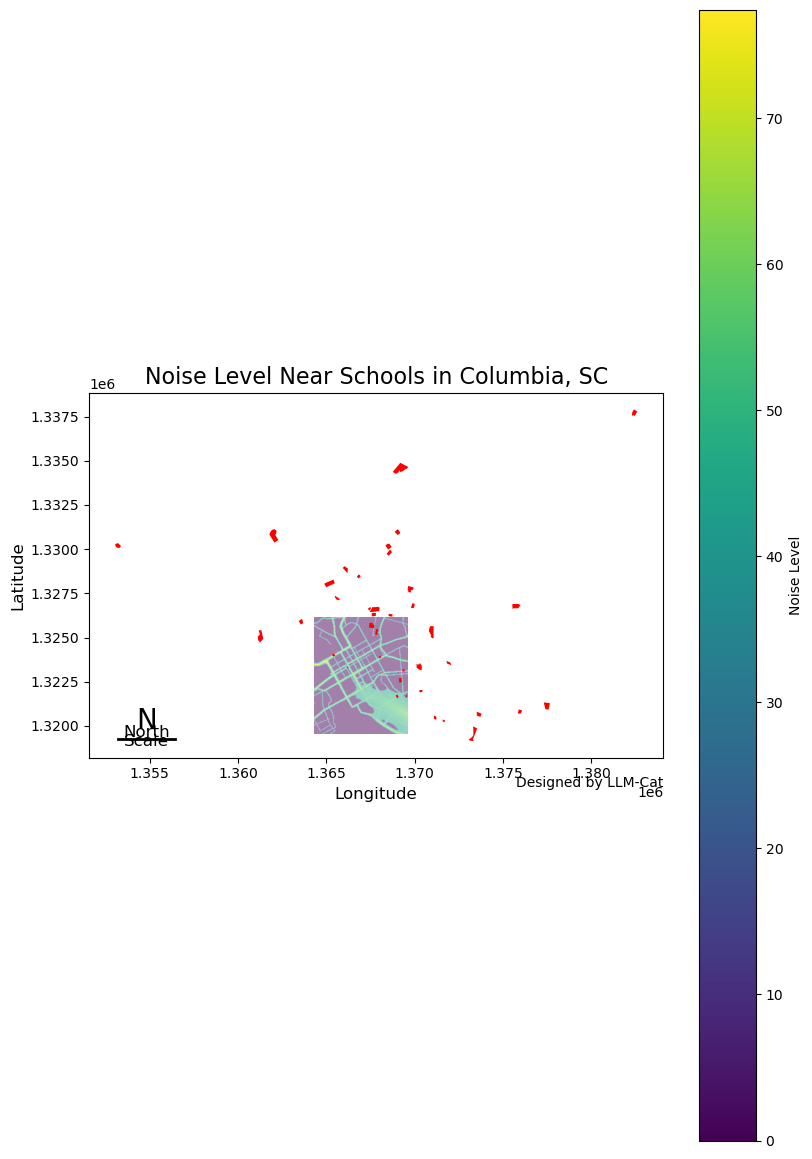

In [35]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))

all_code = solution.execute_complete_program(code=all_code, try_cnt=10)